<a href="https://colab.research.google.com/github/DevashishX/Deep-Learning-Models/blob/master/DLAZ_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self Organizing Maps from Deep Learning A-Z on Udemy

We do unsupervised clustering using self organized maps in deep learning. SOM is the easiest unsupervised deep learning model used for clustering. We use the SOM implemented in minisom library -  which is downloaded along with dataset

The dataset consists of credit card transactions data, our goal is to cluster tha data in such a way that the fraudulent transactions can be identified in seperate clusters.

# Getting the Dataset

In [4]:
!wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Self-Organizing-Maps.zip
!unzip -q P16-Self-Organizing-Maps.zip
!mv Self_Organizing_Maps/* . 

--2020-05-09 04:03:56--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Self-Organizing-Maps.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.96.40
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.96.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17004 (17K) [application/zip]
Saving to: ‘P16-Self-Organizing-Maps.zip’

P16-Self-Organizing 100%[===================>]  16.61K  --.-KB/s    in 0s      

2020-05-09 04:03:56 (33.5 MB/s) - ‘P16-Self-Organizing-Maps.zip’ saved [17004/17004]



# Data Preprocessing

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training 

In [0]:
from minisom import MiniSom

In [0]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)

In [0]:
som.train_random(data = X, num_iteration = 100)

# Visualization

In [0]:
from pylab import bone, pcolor, colorbar, plot, show

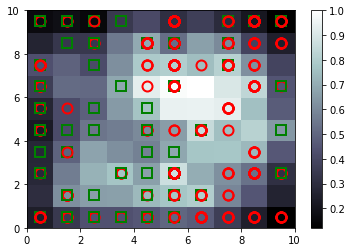

In [12]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

#Finding the fraud in the credit card dataset

In [36]:
mappings = som.win_map(X)
frauds = np.asarray(mappings[(6,7)])
# # frauds = np.concatenate((mappings[(7,6)]), axis = 0).reshape(-1,1)
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5735221e+07, 1.0000000e+00, 2.2920000e+01, 1.7000000e-01,
        2.0000000e+00, 7.0000000e+00, 4.0000000e+00, 8.5000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00]])

In [37]:
print(frauds)

[[1.5735221e+07 1.0000000e+00 2.2920000e+01 1.7000000e-01 2.0000000e+00
  7.0000000e+00 4.0000000e+00 8.5000000e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00]]
